In [1]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Van
[nltk_data]     Cloui\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

import praw
import pandas as pd
import datetime as dt

pd.options.display.max_columns = None
pd.options.display.width = None


reddit = praw.Reddit(client_id='gP1ZDwru6lQ7_Q', \
                     client_secret='', \
                     user_agent='Scraping', \
                     username='', \
                     password='')

subreddit = reddit.subreddit('wallstreetbets')

# .hot, .new, .controversial, .top, and .gilded. You can also use .search("SEARCH_KEYWORDS")


gains_list = subreddit.hot(limit=800)

gains_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}

for submission in gains_list:
    gains_dict["title"].append(submission.title)
    gains_dict["score"].append(submission.score)
    gains_dict["id"].append(submission.id)
    gains_dict["url"].append(submission.url)
    gains_dict["comms_num"].append(submission.num_comments)
    gains_dict["created"].append(submission.created)
    gains_dict["body"].append(submission.selftext)



gains_data = pd.DataFrame(gains_dict)  ###data input HERE IVAN DON'T LOOK AROUND TOO MUCH, IT'S HERE

def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = gains_data["created"].apply(get_date)
gains_data = gains_data.assign(timestamp = _timestamp)

Title = gains_data["title"]

Title

Telo = gains_data["body"]


all_sentences = []

for word in Title:
    all_sentences.append(word)
for word in Telo:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


# print(lines)


Version 7.4.0 of praw is outdated. Version 7.5.0 was released Sunday November 14, 2021.


In [3]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [4]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
# stem

In [5]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

# stem2

In [6]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [7]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 2810, 2: 707, 3: 374, 4: 234, 5: 176, 6: 133, 7: 119, 8: 76, 9: 62, 11: 60, ...})

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

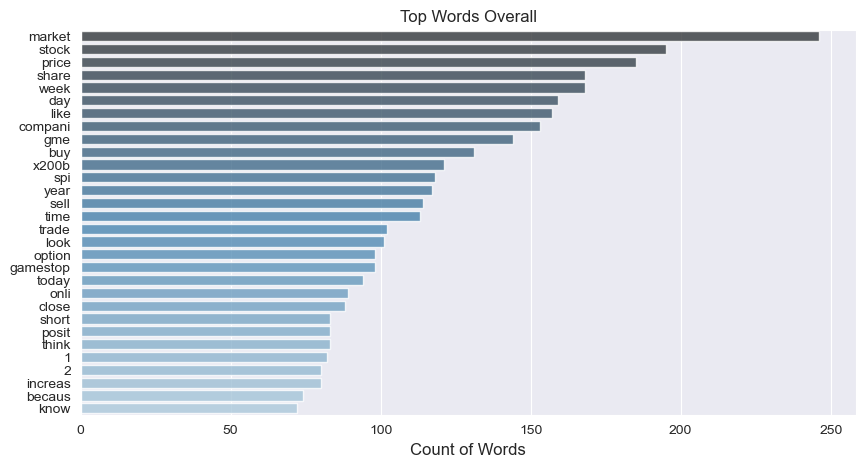

In [9]:
df = df[:30,]
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")
plt.title('Top Words Overall')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [10]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_lg
nlp = en_core_web_lg.load()

In [11]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [12]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

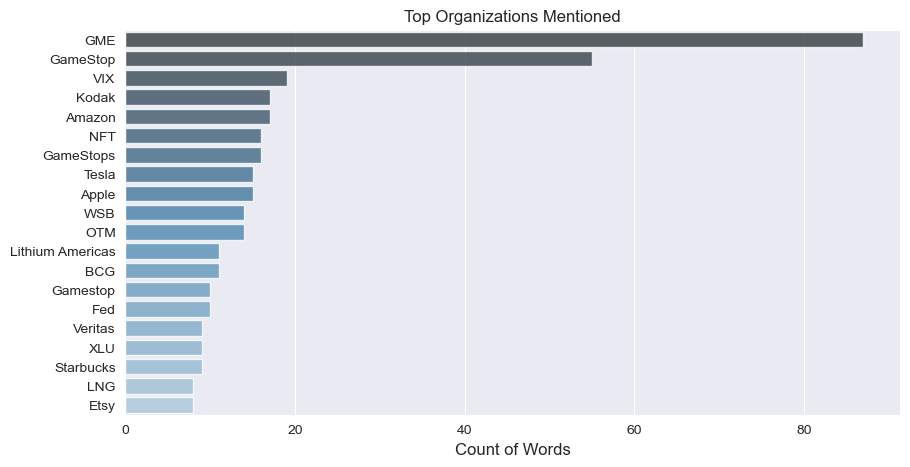

In [13]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")

plt.title('Top Organizations Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [14]:

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

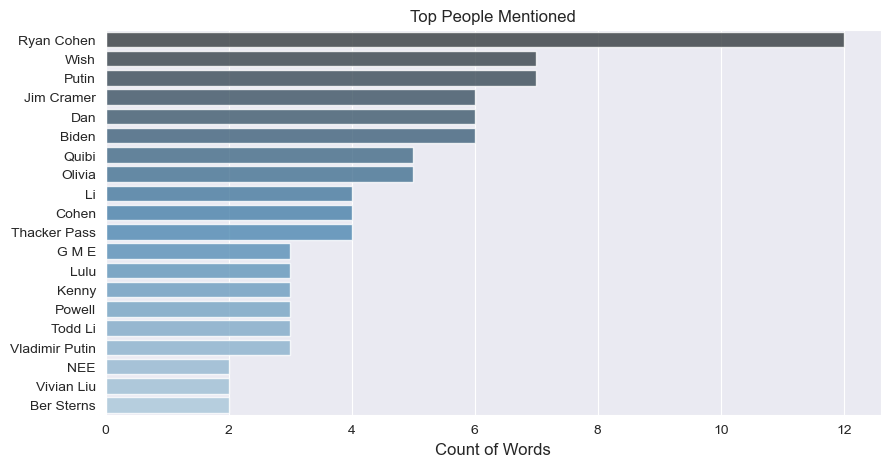

In [15]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8,  palette="Blues_d")
plt.title('Top People Mentioned')
plt.ylabel('', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [16]:
gains_data



,title,score,id,url,comms_num,created,body,timestamp
0,"What Are Your Moves Tomorrow, March 30, 2022",58,trgp26,https://www.reddit.com/r/wallstreetbets/commen...,1438,1.648584e+09,**Read [rules](https://www.reddit.com/r/wallst...,2022-03-29 21:00:10
1,WSB's First Annual Paper Trading Competition F...,898,tqb8g7,https://www.reddit.com/r/wallstreetbets/commen...,858,1.648480e+09,What a year it has been! We've had a lot of fi...,2022-03-28 16:00:12
2,"GME reached $448,950 seconds before halt. I wa...",17015,tr55d1,https://i.redd.it/hkxs1qw5hcq81.jpg,1380,1.648569e+09,,2022-03-29 16:53:40
3,Starts a YouTube channel on how to become a mi...,6936,tr5p6g,https://i.redd.it/zw7xsko8jcq81.jpg,110,1.648570e+09,,2022-03-29 17:05:17
4,💲 G M E 💵 Overcoming Routine Technical 'Techni...,2031,trdnei,https://www.reddit.com/r/wallstreetbets/commen...,174,1.648578e+09,"# Market Price Action\n\nIt's just a Tuesday, ...",2022-03-29 19:26:26
...,...,...,...,...,...,...,...,...
537,TSLA 5K -> 23K in a day yolo. Saw papa Elon da...,50,tkb4e3,https://i.redd.it/q9i9ghvimzo81.jpg,10,1.647978e+09,,2022-03-22 19:36:21
538,China Seen Asking US-Listed Firms to Prepare F...,71,tk7kbs,https://www.reddit.com/r/wallstreetbets/commen...,22,1.647968e+09,Chinese regulators have told some of the count...,2022-03-22 16:59:05
539,Chinese Firms Flock to Switzerland as US Delis...,121,tk3x1v,https://www.reddit.com/r/wallstreetbets/commen...,28,1.647958e+09,Switzerland has become a new listing destinati...,2022-03-22 14:12:27
540,What is tax lost harvesting?,23,tkfile,https://i.redd.it/z915nkdul0p81.png,29,1.647990e+09,,2022-03-22 22:54:27


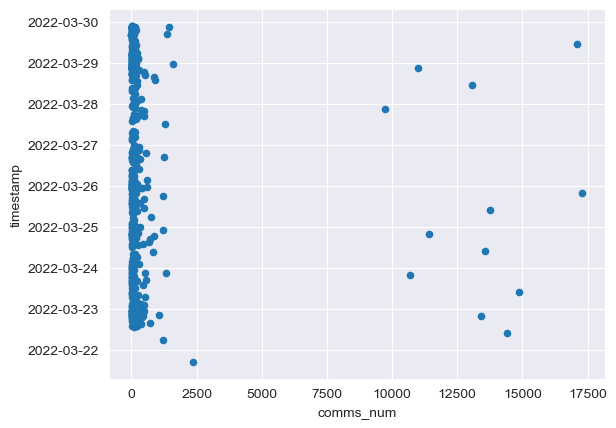

In [17]:

gains_data.plot.scatter(x= "comms_num", y = "timestamp")
# pd.set_option('max_columns', None)

# gains_data.iloc[332]
# gains_data.iloc[253]

In [18]:
 gains_data_sorted_comms = gains_data.sort_values(["comms_num"], ascending = False)
    
gains_data_sorted_comms[:20] 

samo_bitno = gains_data_sorted_comms[["title","timestamp", "url", "body"]]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

url = samo_bitno["url", "timestamp"]


# rk = gains_dict["url"]
# if url in rk:
#     .append




SyntaxError: invalid syntax (<ipython-input-18-09a0b515a4f6>, line 14)

 What Are Your Moves Tomorrow March 30 2022 WSBs First Annual Paper Trading Competition For Real This Time GME reached 448950 seconds before halt I was watching this as it was happening LFG Starts a YouTube channel on how to become a millionaire  G M E  Overcoming Routine Technical Technicalities to Remain Jacked Bull time 420000069 this week Apes after the dip Welp When Cramer recommends a stock you own Ryan Cohen knows what he is doing with BBBY and last time he did this with GME It ran 3000 with in 3 months Interest Rates Just woke up at 4am to make sure I could still buy some GME and at a steal 191 DFV This is the Way I DONT OWN ENOUGH GME  Prepare for TitJacking Tuesday Its free money Jim Cramer running his Hedge Fund back in 1997 a year later 1998 he lost 91 million while the SP 500 Index rose 29  Business Insider GME Yolo 300k135mil Dios mos man ALL IN GMEE Bull market confirmed GME YOLO 3292022   Getting ready for the power hour 128k Profit on SPY Calls My only regret with GME 

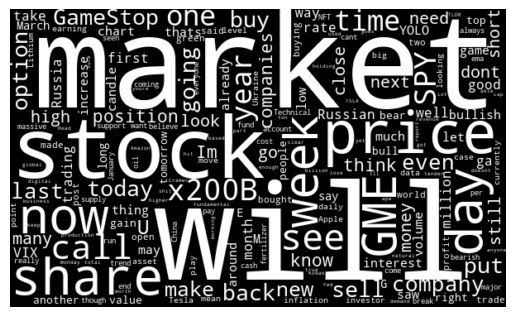

In [20]:
from wordcloud import WordCloud
# stemdf = pd.DataFrame(stem2)
# ''.join(lines)
# print(stemdf)
text = ''
for x in lines:
    text += ' ' + x

print(text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(color_func=lambda *args, **kwargs: "white" ,background_color='black',scale=0.6,width=1000, height=600, collocations = False).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()